<a href="https://colab.research.google.com/github/ProxMaq/ProxVision/blob/main/CDI%20%26%20TRR/Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow

In [ ]:
!unzip '/content/drive/MyDrive/Dataset_new.zip' 

Archive:  /content/drive/MyDrive/Dataset_new.zip
   creating: Dataset/Dataset/
   creating: Dataset/Dataset/Train/
   creating: Dataset/Dataset/Train/Handwritten_Text/
  inflating: Dataset/Dataset/Train/Handwritten_Text/IMG-20210918-WA0153.jpg  
  inflating: Dataset/Dataset/Train/Handwritten_Text/IMG-20210918-WA0154.jpg  
  inflating: Dataset/Dataset/Train/Handwritten_Text/IMG-20210918-WA0155.jpg  
  inflating: Dataset/Dataset/Train/Handwritten_Text/IMG-20210918-WA0157.jpg  
  inflating: Dataset/Dataset/Train/Handwritten_Text/IMG-20210918-WA0158.jpg  
  inflating: Dataset/Dataset/Train/Handwritten_Text/IMG-20210918-WA0160.jpg  
  inflating: Dataset/Dataset/Train/Handwritten_Text/IMG-20210918-WA0161.jpg  
  inflating: Dataset/Dataset/Train/Handwritten_Text/IMG-20210918-WA0166.jpg  
  inflating: Dataset/Dataset/Train/Handwritten_Text/IMG-20210918-WA0331.jpg  
  inflating: Dataset/Dataset/Train/Handwritten_Text/IMG-20210918-WA0332.jpg  
  inflating: Dataset/Dataset/Train/Handwritten_Text/

In [ ]:
trdata=ImageDataGenerator()
traindata=trdata.flow_from_directory(directory="/content/Dataset/Dataset/Train",target_size=(224,224))

Found 775 images belonging to 4 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
tsdata=ImageDataGenerator()
testdata=tsdata.flow_from_directory(directory="/content/Dataset/Dataset/Train",target_size=(224,224))

Found 775 images belonging to 4 classes.


In [ ]:
testdata.class_indices

{'Handwritten_Text': 0,
 'Metal_Currency': 1,
 'Paper_Currency': 2,
 'Print_Text': 3}

In [ ]:
VGG=tensorflow.keras.applications.VGG16(input_shape=(224,224,3),
                             include_top=False,
                             weights='imagenet')

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
VGG.trainable=False

In [ ]:
model=keras.Sequential(
    [VGG,
     keras.layers.Flatten(),
     keras.layers.Dense(units=256,activation='relu'),
     keras.layers.Dense(units=256,activation='relu'),
     keras.layers.Dense(units=4,activation='softmax')
    ]
)

In [ ]:
model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 21,204,292
Trainable params: 6,489,604
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
hist=model.fit_generator(
                         generator=traindata,
                         validation_data=testdata,
                         validation_steps=10,
                         epochs=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/2
25/25 [==============================] - 86s 3s/step - loss: 3.4924 - accuracy: 0.8710 - val_loss: 0.0180 - val_accuracy: 0.9969
Epoch 2/2
25/25 [==============================] - 67s 3s/step - loss: 0.2626 - accuracy: 0.9832 - val_loss: 0.2981 - val_accuracy: 0.9750


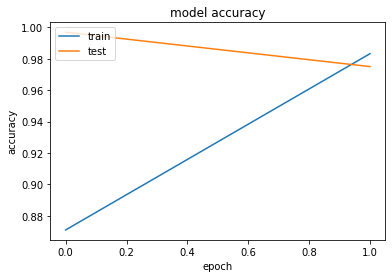

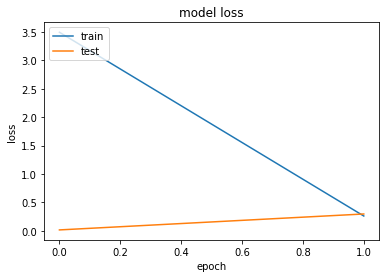

In [ ]:
import matplotlib.pyplot as plt

# Summarize history for accuracy

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
model.save('vgg.h5')

In [ ]:
import cv2
img=cv2.imread('/content/Dataset/Dataset/Train/Handwritten_Text/IMG-20210918-WA0155.jpg')

In [ ]:
#img=np.array(img)
img.shape

(1040, 780, 3)

In [ ]:
img=cv2.resize(img,(224,224))
img.shape

(224, 224, 3)

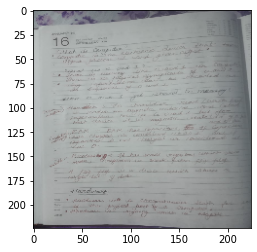

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img)

In [ ]:
from tensorflow.keras.models import load_model

saved_model=load_model('vgg.h5')

In [ ]:
img = np.reshape(img,[1,224,224,3])

In [ ]:
out=saved_model.predict(img)

In [ ]:
out

array([[1.0000000e+00, 2.9177565e-32, 0.0000000e+00, 2.1309142e-20]],
      dtype=float32)

In [ ]:
if out[0][0]>out[0][1] and out[0][0]>out[0][2] and out[0][0]>[0][3]:
  print("Handwritten text")
elif out[0][1]>out[0][0] and out[0][1]>out[0][2] and out[0][1]>[0][3] :
  print("Metal Currency")
elif  out[0][2]>out[0][0] and out[0][2]>out[0][1] and out[0][2]>[0][3]:
  print("Paper Currency")
else:
  print("Print Text")

IndexError: ignored